### Step-by-step : Dot-product attention layer, a.k.a. Luong-style attention.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
tf.__version__, keras.__version__

('2.3.0', '2.4.0')

In [4]:
T = 100
D = 128 #hidden_size

<img src='image/attention_equation_0.jpg' width=640px />

In [5]:
x = keras.Input(shape=(T, D)) # hidden_states

In [6]:
score1 = layers.Dense(D, use_bias=False, name='attention_score_vec')(x) #score_first_part

In [7]:
h_t = layers.Lambda(lambda x: x[:, -1, :], output_shape=(D,), name='last_hidden_state')(x)

In [8]:
x.shape, score1.shape, h_t.shape

(TensorShape([None, 100, 128]),
 TensorShape([None, 100, 128]),
 TensorShape([None, 128]))

In [9]:
score = layers.dot([score1, h_t], [2, 1], name='attention_score')

In [10]:
attention_weights = layers.Activation('softmax', name='attention_weight_softmax')(score)

In [11]:
model = keras.Model(x, attention_weights, name="test")

In [12]:
model.summary()

Model: "test"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128)]   0                                            
__________________________________________________________________________________________________
attention_score_vec (Dense)     (None, 100, 128)     16384       input_1[0][0]                    
__________________________________________________________________________________________________
last_hidden_state (Lambda)      (None, 128)          0           input_1[0][0]                    
__________________________________________________________________________________________________
attention_score (Dot)           (None, 100)          0           attention_score_vec[0][0]        
                                                                 last_hidden_state[0][0]       

In [13]:
D*D

16384

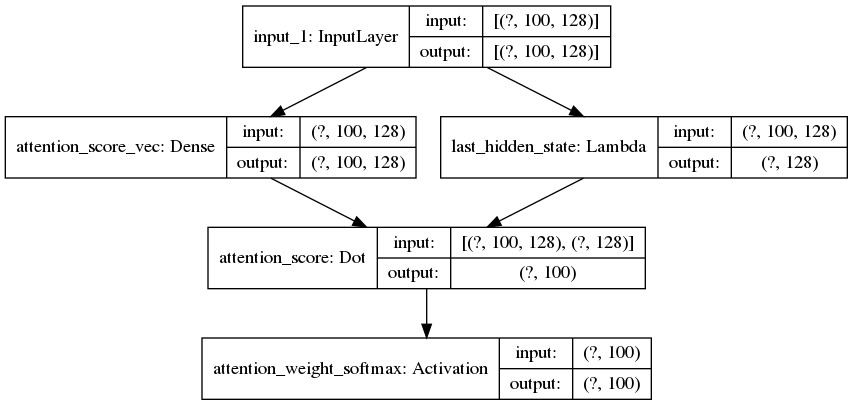

In [14]:
tf.keras.utils.plot_model(model, to_file="model_test.png", show_shapes=True)

In [15]:
# (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
context_vector = layers.dot([x, attention_weights], [1, 1], name='context_vector') #hidden_states, attention_weights

In [16]:
model2 = keras.Model(x, context_vector, name="test2")

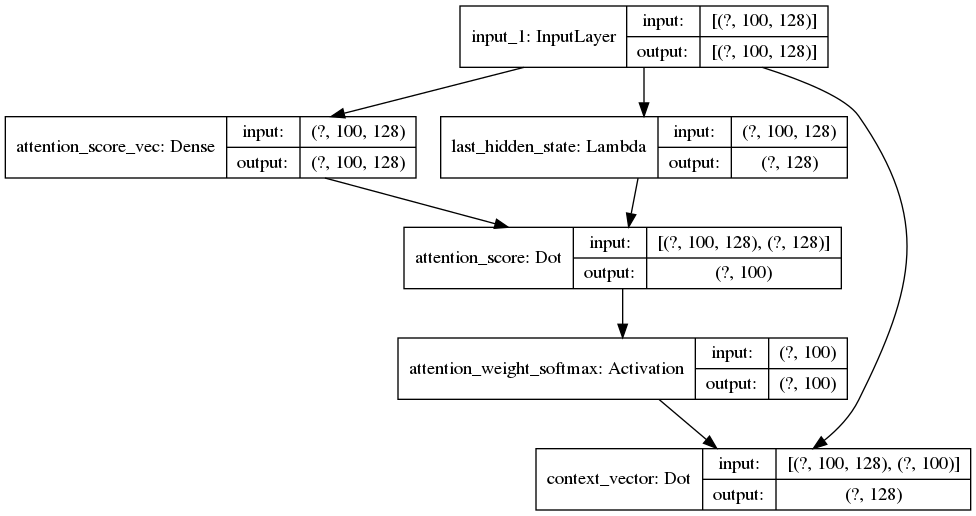

In [17]:
tf.keras.utils.plot_model(model2, to_file="model2_test.png", show_shapes=True)

In [18]:
context_vector.shape, h_t.shape

(TensorShape([None, 128]), TensorShape([None, 128]))

In [19]:
pre_activation = layers.concatenate([context_vector, h_t], name='attention_output')
attention_vector = layers.Dense(D, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)

In [20]:
model3 = keras.Model(x, attention_vector, name="test3")

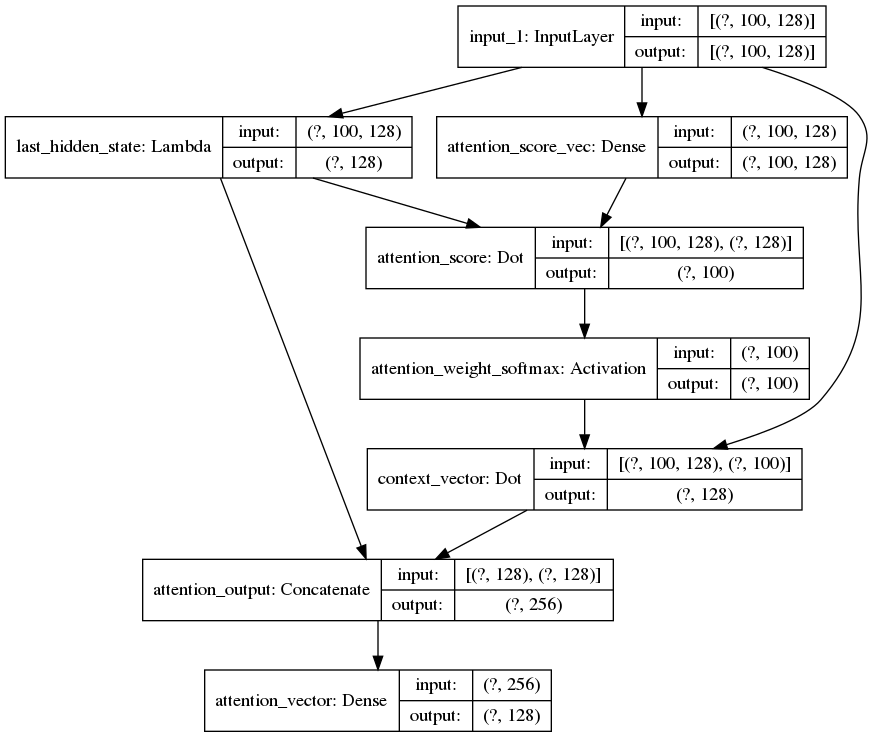

In [21]:
tf.keras.utils.plot_model(model3, to_file="model3_test.png", show_shapes=True)

Adding a dense layer.

In [22]:
y = layers.Dense(1, activation='linear')(attention_vector)

In [23]:
model4 = keras.Model(x, y, name="testy")

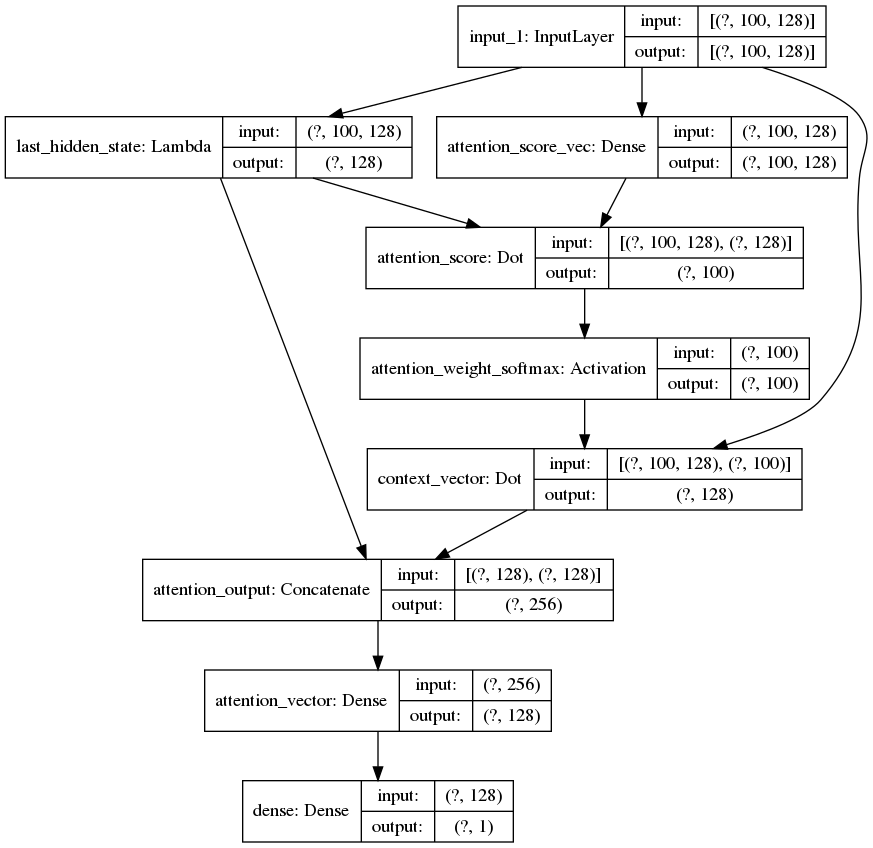

In [24]:
tf.keras.utils.plot_model(model4, to_file="model4_test.png", show_shapes=True)

### References

* Keras Attention Mechanism https://github.com/philipperemy/keras-attention-mechanism